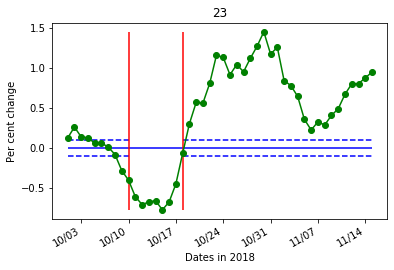

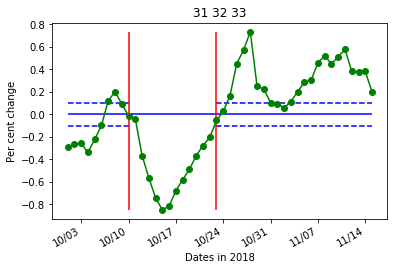

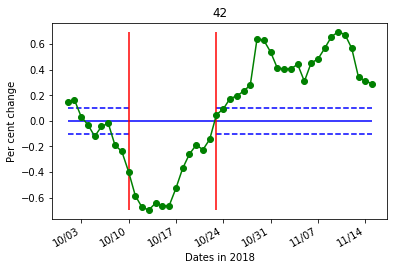

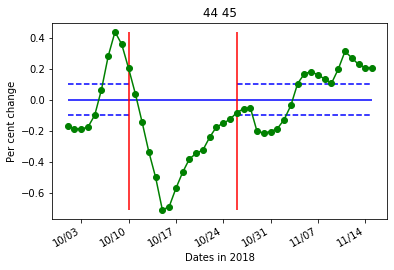

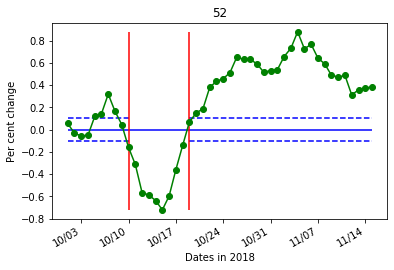

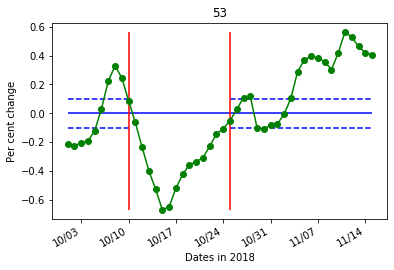

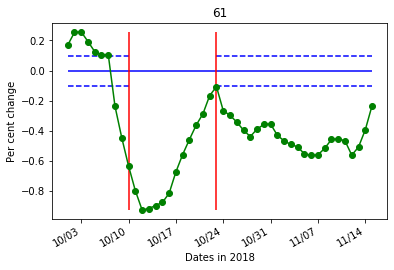

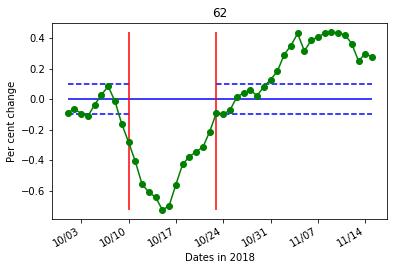

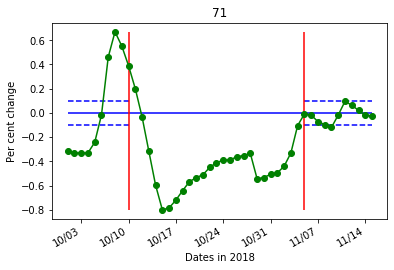

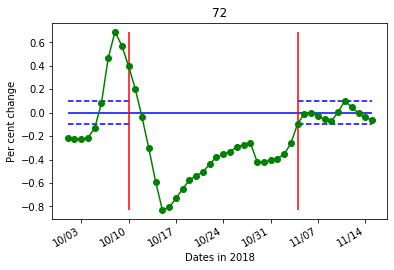

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

#Cities: Panama_city, Panama_city_beach, Lynn_haven, Tallahassee
city = 'Panama_city_beach'

data_2018_08 = pd.read_excel(city + '_2018_08.xlsx','Sheet1')
data_2018_09 = pd.read_excel(city + '_2018_09.xlsx','Sheet1')
data_2018_10 = pd.read_excel(city + '_2018_10.xlsx','Sheet1')
data_2018_11 = pd.read_excel(city + '_2018_11.xlsx','Sheet1')
data_2018_08 = data_2018_08[['category','visits_by_day']]
data_2018_09 = data_2018_09[['category','visits_by_day']]
data_2018_10 = data_2018_10[['category','visits_by_day']]
data_2018_11 = data_2018_11[['category','visits_by_day']]

#Change category
#category = [[23],[31,32,33],[42],[44,45],[48,49],[52],[53],[56],[61],[62],[71],[72],[92]]
category = [[23],[31,32,33],[42],[44,45],[52],[53],[61],[62],[71],[72]]

for k in range(len(category)):
    #Visits for baseline
    df_08 = data_2018_08[data_2018_08['category'].isin(category[k])].reset_index()
    df_09 = data_2018_09[data_2018_09['category'].isin(category[k])].reset_index()
    
    visits_08, visits_09 = [0] * 31, [0] * 30
    for i in range(len(df_08)):
        visits_08 = np.sum([visits_08, eval(df_08['visits_by_day'][i])], axis=0)
    for i in range(len(df_09)):
        visits_09 = np.sum([visits_09, eval(df_09['visits_by_day'][i])], axis=0)
    
    visits_ba = list(visits_08[-4:]) + list(visits_09)
    df_visits_ba = pd.DataFrame({'visits_ba': visits_ba}).rolling(7).mean()
    visits_ba = df_visits_ba['visits_ba'].tolist()[6:]
    visits_ba = visits_ba + visits_ba[0:18]
    
    #Visits for hurricane
    df_10 = data_2018_10[data_2018_10['category'].isin(category[k])].reset_index()
    df_11 = data_2018_11[data_2018_11['category'].isin(category[k])].reset_index()
    
    visits_10, visits_11 = [0] * 31, [0] * 30
    for i in range(len(df_10)):
        visits_10 = np.sum([visits_10, eval(df_10['visits_by_day'][i])], axis=0)
    for i in range(len(df_11)):
        visits_11 = np.sum([visits_11, eval(df_11['visits_by_day'][i])], axis=0)

    visits = list(visits_09[-6:]) + list(visits_10) + list(visits_11)[0:15]
    df_visits = pd.DataFrame({'visits': visits}).rolling(7).mean()
    visits = df_visits['visits'].tolist()[6:]
    
    #Per cent change
    per_cent_change = []
    for i in range(len(visits)):
        per_cent_change.append((visits[i] - visits_ba[i]) / visits_ba[i])
    
    #Determination of during-disaster and post-disaster periods
    bottom = per_cent_change.index(min(per_cent_change[9:19]))
    pointer = bottom
    while pointer < 45:
        pointer += 1
        if per_cent_change[pointer] >= -0.1 and per_cent_change[pointer+1] >= -0.1:
            break
    if pointer == 45:
        peak = per_cent_change.index(max(per_cent_change[bottom:]))
        pointer = peak
    
    #Visualization
    dates = list(range(20181001,20181032)) + list(range(20181101,20181116))
    x = [datetime.strptime(str(d), '%Y%m%d').date() for d in dates]
    plt.plot(x, per_cent_change, 'o-', color = 'g')
    plt.gcf().autofmt_xdate()
    
    plt.hlines(0, x[0], x[45], color = 'b')
    plt.hlines(0.1, x[0], x[9], color = 'b', linestyle = 'dashed')
    plt.hlines(-0.1, x[0], x[9], color = 'b', linestyle = 'dashed')
    plt.hlines(0.1, x[pointer], x[45], color = 'b', linestyle = 'dashed')
    plt.hlines(-0.1, x[pointer], x[45], color = 'b', linestyle = 'dashed')
    plt.vlines(x[9], min(per_cent_change), max(per_cent_change), color = 'r')
    plt.vlines(x[pointer], min(per_cent_change), max(per_cent_change), color = 'r')
    
    plt.xlabel('Dates in 2018')
    plt.ylabel('Per cent change')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    plt.xticks(x[2::7])
    
    plt.title(' '.join(map(str, category[k])))
    plt.savefig(' '.join(map(str, category[k])) + '.svg', dpi=600)
    #plt.savefig(' '.join(map(str, category[k])) + '.png')
    plt.show()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Cities: Panama_city, Panama_city_beach, Lynn_haven, Tallahassee
city = 'Lynn_haven'

data_2018_08 = pd.read_excel(city + '_2018_08.xlsx','Sheet1')
data_2018_09 = pd.read_excel(city + '_2018_09.xlsx','Sheet1')
data_2018_10 = pd.read_excel(city + '_2018_10.xlsx','Sheet1')
data_2018_11 = pd.read_excel(city + '_2018_11.xlsx','Sheet1')
data_2018_08 = data_2018_08[['category','visits_by_day']]
data_2018_09 = data_2018_09[['category','visits_by_day']]
data_2018_10 = data_2018_10[['category','visits_by_day']]
data_2018_11 = data_2018_11[['category','visits_by_day']]

#Change category
#category = [[23],[31,32,33],[42],[44,45],[48,49],[52],[53],[56],[61],[62],[71],[72],[92]]
category = [[53],[71]]

for k in range(len(category)):
    #Visits for baseline
    df_08 = data_2018_08[data_2018_08['category'].isin(category[k])].reset_index()
    df_09 = data_2018_09[data_2018_09['category'].isin(category[k])].reset_index()
    
    visits_08, visits_09 = [0] * 31, [0] * 30
    for i in range(len(df_08)):
        visits_08 = np.sum([visits_08, eval(df_08['visits_by_day'][i])], axis=0)
    for i in range(len(df_09)):
        visits_09 = np.sum([visits_09, eval(df_09['visits_by_day'][i])], axis=0)
    
    visits_ba = list(visits_08[-4:]) + list(visits_09)
    df_visits_ba = pd.DataFrame({'visits_ba': visits_ba}).rolling(7).mean()
    visits_ba = df_visits_ba['visits_ba'].tolist()[6:]
    visits_ba = visits_ba + visits_ba[0:18]
    
    #Visits for hurricane
    df_10 = data_2018_10[data_2018_10['category'].isin(category[k])].reset_index()
    df_11 = data_2018_11[data_2018_11['category'].isin(category[k])].reset_index()
    
    visits_10, visits_11 = [0] * 31, [0] * 30
    for i in range(len(df_10)):
        visits_10 = np.sum([visits_10, eval(df_10['visits_by_day'][i])], axis=0)
    for i in range(len(df_11)):
        visits_11 = np.sum([visits_11, eval(df_11['visits_by_day'][i])], axis=0)

    visits = list(visits_09[-6:]) + list(visits_10) + list(visits_11)[0:15]
    df_visits = pd.DataFrame({'visits': visits}).rolling(7).mean()
    visits = df_visits['visits'].tolist()[6:]
    
    #Per cent change
    per_cent_change = []
    for i in range(len(visits)):
        per_cent_change.append((visits[i] - visits_ba[i]) / visits_ba[i])
    
    #Determination of during-disaster and post-disaster periods
    bottom = per_cent_change.index(min(per_cent_change[9:19]))
    pointer = bottom
    while pointer < 45:
        pointer += 1
        if per_cent_change[pointer] >= -0.1 and per_cent_change[pointer+1] >= -0.1:
            break
    if pointer == 45:
        peak = per_cent_change.index(max(per_cent_change[bottom:]))
        pointer = peak
    
    #Pre-disaster effect indicator
    pre_sum = 0
    for i in range(2, 9):
        pre_sum += max(per_cent_change[i], 0)
    print(' '.join(map(str, category[k])), ',', pre_sum)
    
    #Impact indicator
    cur_sum = 0
    for i in range(9, pointer):
        cur_sum += per_cent_change[i]
    print(' '.join(map(str, category[k])), ',', cur_sum)
    
    #Residual effect indicator
    print(' '.join(map(str, category[k])), ',', np.mean(per_cent_change[pointer:]))
    
    #x = np.linspace(0, 7, 8)
    #plt.plot(x, per_cent_change[2:10], 'o-', color = 'g')
    #plt.hlines(0, x[0], x[-1], color = 'b', linestyle = 'dashed')
    
    #plt.xlabel('Pre-disaster stage')
    #plt.ylabel('Percentage change')
    
    #plt.savefig('example.svg', dpi=600)
    #plt.show()

53 , 0.9122159001156169
53 , -16.091236561776693
53 , -0.4471775937608558
71 , 1.8253873945966808
71 , -3.7527340741603
71 , 0.1720613117171193


In [2]:
import numpy as np
import pandas as pd

#Cities: Panama_city, Panama_city_beach, Lynn_haven, Tallahassee
city = 'Panama_city_beach'

data_2018_11 = pd.read_excel(city + '_2018_11.xlsx','Sheet1')
data_2018_11 = data_2018_11[['naics_code','category']]
#category = [[23],[31,32,33],[42],[44,45],[48,49],[52],[53],[56],[61],[62],[71],[72],[92]]
df_11 = data_2018_11[data_2018_11['category'].isin([48])].reset_index()
print(df_11.shape[0])

count1 = 0
for i in range(df_11.shape[0]):
    string = str(df_11['naics_code'][i])[0:3]
    if '441' in string or '442' in string or '444' in string:
        count1 += 1
#print(count1)

print(df_11)

2
   index  naics_code  category
0     31    485210.0      48.0
1    176    487110.0      48.0


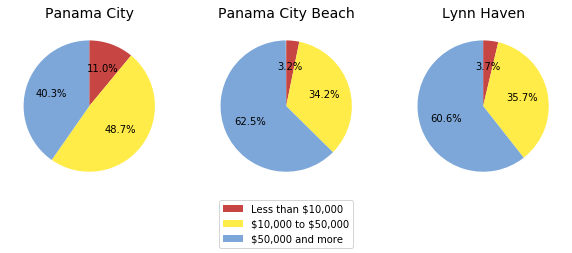

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df2=pd.read_excel('Figure Data.xlsx','Sheet2')
labels=['Less than $10,000','$10,000 to $50,000','$50,000 and more']
colors=[(199/255,69/255,66/255),(255/255,236/255,72/255),(125/255,167/255,217/255)]

plt.figure(figsize=(10,4))

plt.subplot(131)
plt.title('Panama City',fontsize=14)
plt.pie(df2.iloc[0,1:],colors=colors,counterclock=False,startangle=90,autopct='%0.1f%%')
plt.subplot(132)
plt.title('Panama City Beach',fontsize=14)
plt.pie(df2.iloc[1,1:],colors=colors,counterclock=False,startangle=90,autopct='%0.1f%%')
plt.subplot(133)
plt.title('Lynn Haven',fontsize=14)
plt.pie(df2.iloc[2,1:],colors=colors,counterclock=False,startangle=90,autopct='%0.1f%%')
plt.figlegend(labels=['Less than $10,000','\$10,000 to \$50,000','$50,000 and more'],loc='lower center')

plt.savefig('income.svg', dpi=600, bbox_inches='tight')
plt.show()

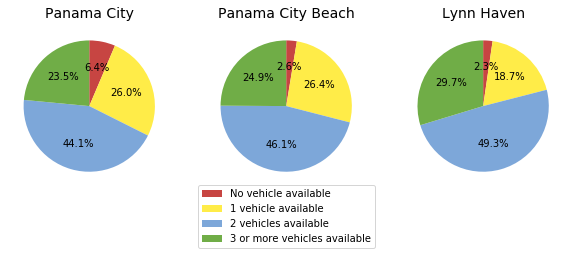

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_excel('Figure Data.xlsx','Sheet3')
labels=['No vehicle available','1 vehicle available','2 vehicles available','3 or more vehicles available']
colors=[(199/255,69/255,66/255),(255/255,236/255,72/255),(125/255,167/255,217/255),(112/255,173/255,71/255)]

plt.figure(figsize=(10,4))

plt.subplot(131)
plt.title('Panama City',fontsize=14)
plt.pie(df.iloc[0,1:],colors=colors,counterclock=False,startangle=90,autopct='%0.1f%%')
plt.subplot(132)
plt.title('Panama City Beach',fontsize=14)
plt.pie(df.iloc[1,1:],colors=colors,counterclock=False,startangle=90,autopct='%0.1f%%')
plt.subplot(133)
plt.title('Lynn Haven',fontsize=14)
plt.pie(df.iloc[2,1:],colors=colors,counterclock=False,startangle=90,autopct='%0.1f%%')
plt.figlegend(labels=['No vehicle available','1 vehicle available','2 vehicles available','3 or more vehicles available'],loc='lower center')

plt.savefig('vehicle.svg', dpi=600, bbox_inches='tight')
plt.show()

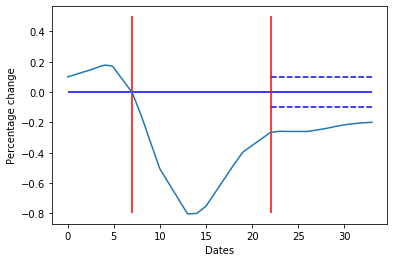

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x = [0,2.8,3.6,4.1,4.86,7,8,9,10,13,14,15,18,19,22,23,24,26,28,29,30,31,32,33]
#y_no_pre = [0.15,0.14,0.13,0.12,0.1,0] + [-0.1545,-0.336,-0.5204,-0.7754,-0.8,-0.7754,-0.5204,-0.336]
y_no_pre = [-0.01,-0.02,-0.03,-0.04,-0.06,-0.16] + [-0.2045,-0.336,-0.5204,-0.7754,-0.8,-0.7754,-0.5204,-0.336]
y_with_pre = [0.1,0.15,0.17,0.19,0.16,0] + [-0.1545,-0.336,-0.5204,-0.7754,-0.8,-0.7754,-0.5204,-0.336]
y_post = [-0.0829,-0.0677,-0.0588,-0.0464,-0.0445,-0.02794,-0.02094,-0.00448,-0.00253,0]

y1 = y_no_pre + [i + 0.2 for i in y_post]
z1 = np.polyfit(x, y1, 10)
y2 = y_no_pre + y_post
z2 = np.polyfit(x, y2, 10)
y3 = y_no_pre + [i - 0.2 for i in y_post]
z3 = np.polyfit(x, y3, 10)

y4 = y_with_pre + [i + 0.2 for i in y_post]
z4 = np.polyfit(x, y4, 10)
y5 = y_with_pre + y_post
z5 = np.polyfit(x, y5, 10)
y6 = y_with_pre + [i - 0.2 for i in y_post]
z6 = np.polyfit(x, y6, 10)

#plt.plot(x, np.polyval(z1,x))
#plt.plot(x, np.polyval(z2,x))
#plt.plot(x, np.polyval(z3,x))
#plt.plot(x, np.polyval(z4,x))
#plt.plot(x, np.polyval(z5,x))
plt.plot(x, np.polyval(z6,x))

pointer = 14
plt.hlines(0, x[0], x[-1], color = 'b')
plt.hlines(0.1, x[pointer], x[-1], color = 'b', linestyle = 'dashed')
plt.hlines(-0.1, x[pointer], x[-1], color = 'b', linestyle = 'dashed')
plt.vlines(x[5], min(y4), 0.5, color = 'r')
plt.vlines(x[pointer], min(y4), 0.5, color = 'r')

plt.xlabel('Dates')
plt.ylabel('Percentage change')

plt.savefig('schema3.svg', dpi=600)
plt.show()